In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import sys
from MARBLE import plotting, utils, geometry, net

In [3]:
n = 512
k = 30

# Continuously deform a parabola to a saddle

In [4]:
def f(x, alpha=0):
    return x[:,[0]]**2 - alpha*x[:,[1]]**2 

In [5]:
n_steps = 10
beta = np.linspace(-1, 1, n_steps)
x = [geometry.sample_2d(n, [[-1,-1],[1,1]], 'random') for i in range(n_steps)]
y = [f(x_, beta[i]) for i,x_ in enumerate(x)] #evaluated functions

data = utils.construct_dataset(x, y, graph_type='cknn', k=k)

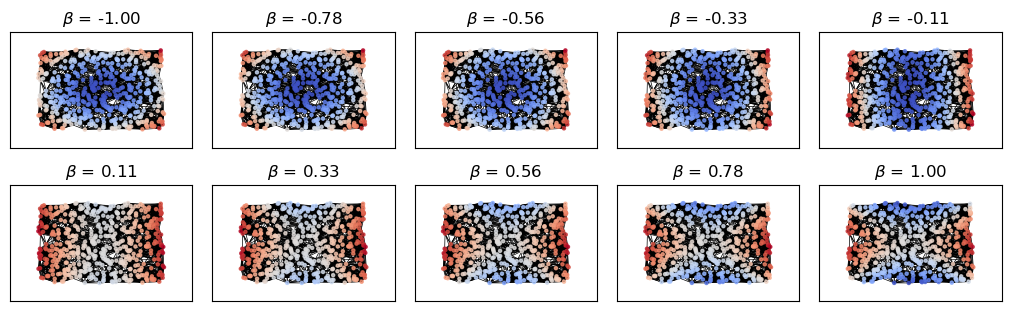

In [8]:
titles = [r'$\beta$ = {:0.2f}'.format(a)  for a in beta]
plotting.fields(data, col=5, figsize=(10,3), node_size=5, titles=titles)#, save='scalar_fields.svg')

# Train network

In [9]:
!export CUDA_VISIBLE_DEVICES=0

par = {'batch_size': 256, #batch size, this should be as large as possible
       'epochs': 30, #optimisation epochs
       'order': 2, #order of derivatives
       'n_lin_layers': 2,
       'hidden_channels': 16, #number of internal dimensions in MLP
       'out_channels': 4,
       'diffusion': False
       'inner_product_features': True
      }

model = net(data, gauge='global', **par)
model.run_training(data)

/mnt/scratch/lts2/gosztolai/MARBLE/MARBLE/lib/utils.py:57: UserWarning: Vector computation is requested but signal dimension is                      one! Setting vector=False
  warnings.warn('Vector computation is requested but signal dimension is \


---- Settings: 

gauge : global
batch_size : 256
epochs : 30
order : 2
n_lin_layers : 2
hidden_channels : 16
out_channels : 4
diffusion : False
depth : 0
inner_product_features : True
vector : False
frac_geodesic_nb : 2.0
var_explained : 0.9
frac_sampled_nb : 0.8
dropout : 0.0
bias : False
batch_norm : batch_norm
lr : 0.01
seed : 0
signal_dim : 1
emb_dim : 2
n_sampled_nb : 24
n_geodesic_nb : 60


---- Number of features to pass to the MLP:  3
---- Total number of parameters:  148


/mnt/scratch/lts2/gosztolai/miniconda3/envs/MARBLE/lib/python3.9/site-packages/torch/cuda/__init__.py:123: UserWarning: 
    Found GPU4 Tesla K40c which is of cuda capability 3.5.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability supported by this library is 3.7.
    
  warnings.warn(old_gpu_warn % (d, name, major, minor, min_arch // 10, min_arch % 10))



---- Starting training ... 

Epoch: 1, Training loss: 20.2016, Validation loss: 21.6038
Epoch: 2, Training loss: 19.4928, Validation loss: 20.7310
Epoch: 3, Training loss: 19.2917, Validation loss: 19.9034
Epoch: 4, Training loss: 19.0989, Validation loss: 19.3987
Epoch: 5, Training loss: 18.9820, Validation loss: 19.0434
Epoch: 6, Training loss: 18.9086, Validation loss: 18.7229
Epoch: 7, Training loss: 18.8528, Validation loss: 19.3070
Epoch: 8, Training loss: 18.8755, Validation loss: 19.0336
Epoch: 9, Training loss: 18.5538, Validation loss: 18.3308
Epoch: 10, Training loss: 18.4750, Validation loss: 17.9634
Epoch: 11, Training loss: 18.3674, Validation loss: 18.4217
Epoch: 12, Training loss: 18.5502, Validation loss: 18.6940
Epoch: 13, Training loss: 18.2042, Validation loss: 17.9688
Epoch: 14, Training loss: 18.4324, Validation loss: 18.5913
Epoch: 15, Training loss: 18.2342, Validation loss: 18.0375
Epoch: 16, Training loss: 18.4038, Validation loss: 18.1782
Epoch: 17, Training

# Create embeddings and clusters

In [12]:
n_clusters = 10

data = model.evaluate(data)
emb, clusters, dist = geometry.cluster_embedding(data, n_clusters=n_clusters)
emb_MDS = geometry.embed(dist, embed_typ='MDS')

Performed t-SNE embedding on embedded results.


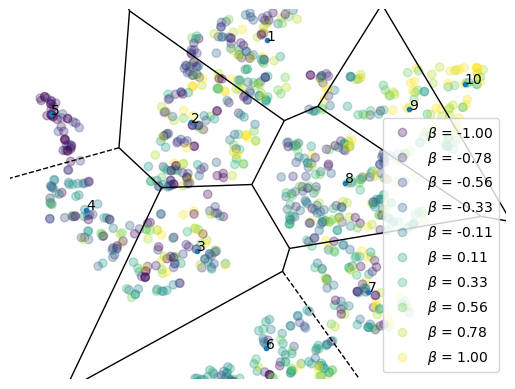

In [13]:
plotting.embedding(emb, data.y.numpy(), clusters, titles=titles)#, save='scalar_fields_embedding.svg') 

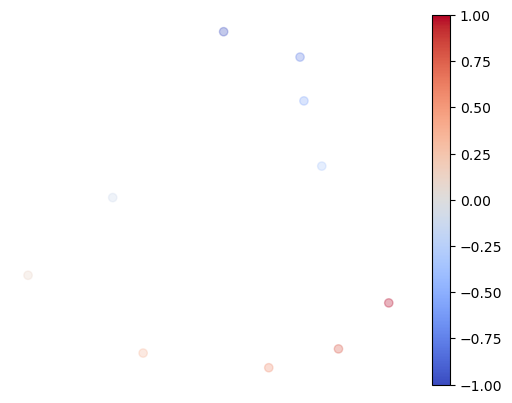

In [14]:
# plotting.neighbourhoods(data, clusters, hops=1, norm=True, save='scalar_fields_nhoods.svg')
plotting.embedding(emb_MDS, beta)#, save='scalar_fields_MDS.svg') 